# Lab 6


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [3]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [4]:
filename="../Lab 6/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [5]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [6]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [7]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

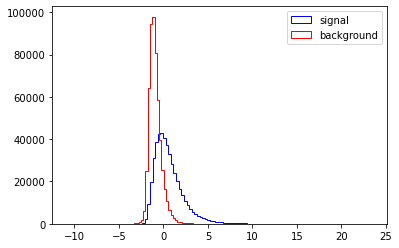

In [8]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [9]:
Fisher.predict(X_Test)

from sklearn.metrics import roc_curve, auc

fpr,tpr, _ = roc_curve(y_Test,Fisher.decision_function(X_Test))
roc_auc = auc(FPR,TPR)

plt.plot(fpr,tpr,color = 'orange', label = 'ROC Curve (Area = %0.2f)'%roc_auc)
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

NameError: name 'FPR' is not defined

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_Test, Fisher.predict(X_Test,))

threshold = -0.1
f1_score(y_Test, np.array(Fisher.decision_function(X_Test)>threshold,dtype='int'))

x_sig = X_Test[y_Test==1]
y_sig = y_Test[y_Test==1]

x_bkg = X_Test[y_Test==0]
y_bkg = y_Test[y_Test==0]

print("sig(f1) score:", f1_score(y_sig, Fisher.predict(x_sig)))
print("bkg(f1) score:", f1_score(y_bkg, Fisher.predict(x_bkg)))

n_sig=10000
n_bkg=100000
x_mix = np.concatenate((x_sig[:N_sig],x_bkg[:n_bkg]))
y_mix = np.concatenate((y_sig[:N_sig],y_bkg[:n_bkg]))

print("mix(f1) score:", f1_score(y_mix, Fisher.predict(x_mix)))

plt.plot(f1_score(y_mix, Fisher.predict(x_mix)))

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [ ]:
#a
#generalized linear model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit (X_Test,y_Test)
y_Pred = reg.predict(X_Test)

print("Coefficients: \n", reg.coef_)

print("Mean Squared Error:%.2f" % mean_squared_error(y_Test,y_Pred))
print("Coefficient of Determenation:%.2f" % r2_score(y_Test, y_Pred))

plt.scatter(X_Test,y_Test, color = 'r')
plt.plot(X_Test,y_Test, color = 'black', linewidth = 3)

plt.xticks()
plt.yticks()
plt.show()


In [10]:
#a 
#baysian ridge regression
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_Test,y_Test)

print(reg.coef_)

[ 2.01259684e-01  4.43962471e-05 -4.95512123e-05  9.32020333e-02
  4.78894687e-06 -9.29001984e-05  1.48033250e-01  3.64129068e-04
  1.32544196e-02  2.52591689e-02 -4.23431804e-02  9.41099471e-03
 -1.86129344e-01 -3.07301577e-02 -1.47901610e-01  1.53048017e-01
 -1.02786324e-02  4.63392981e-01]


In [26]:
#a
#lasso
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_Test, y_Test)
print(reg.predict(X_Test))


[0.38231715 0.40524686 0.46908807 ... 0.39721662 0.66017821 0.46900483]


In [28]:
#b
#generalized linear model
from sklearn import linear_model
import numpy as np

def compare_coefficients(classifier, threshold=0.5):    
    coefficients=classifier.coef_

    if np.all(np.abs(coefficients)>threshold):
        return "All coefficients exceed the threshold. Reject the null hypothesis."
    else:
        return "At least one coefficient does not exceed the threshold. Fail to reject the null hypothesis."

reg=linear_model.BayesianRidge()
reg.fit(X_Test, y_Test)
threshold_value = 0.5
result=compare_coefficients(reg, threshold_value)

print(result)


At least one coefficient does not exceed the threshold. Fail to reject the null hypothesis.


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


Metrics Table:    True Positive Rate (Recall)  False Positive Rate   AUC-ROC  Precision  \
0                     0.576977             0.089865  0.836401   0.458233   

   Recall  F1 Score  
0     1.0  0.685562  


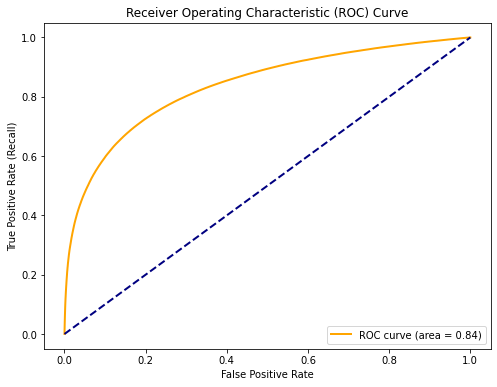

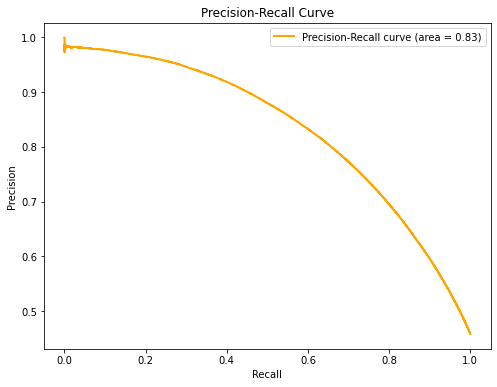

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

Fisher=DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

y_pred=Fisher.predict(X_Test)
y_pred_proba = Fisher.decision_function(X_Test)

conf_matrix=confusion_matrix(y_Test, y_pred)

TPR=conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

FPR=conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])

fpr, tpr, _ = roc_curve(y_Test, y_pred_proba)
roc_auc=auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_Test, y_pred_proba)
pr_auc=auc(recall, precision)

f1=f1_score(y_Test, y_pred)

metrics_table=pd.DataFrame({
    'True Positive Rate (Recall)': [TPR],
    'False Positive Rate': [FPR],
    'AUC-ROC': [roc_auc],
    'Precision': [precision[0]],
    'Recall': [recall[0]],
    'F1 Score': [f1]
})

print("Metrics Table:", metrics_table)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='orange', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()
